In [18]:
''' Importing libraries for usage '''
import pandas as pd # libreria de manejo de funciones para ciencia de datos
import matplotlib.pyplot as plt # libraria para graficacion de datos
import seaborn as sns # libreria para visualizacion de datos
from sklearn.preprocessing import StandardScaler
# paquetes de aprendizaje
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB # especifico para datos numericos y que tengan
#paquete para evaluacion de modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

En esta libreta de jupyter haremos nuestro analisis de los datos recopilados en el conjuto de datos sobre el Titanic

Link a la database: https://www.kaggle.com/brendan45774/test-file

Primero, cargamos los datos

In [12]:
titanic = pd.read_csv("titanic.csv") # Leer conjunto de datos

## Estadisticas Iniciales
Estos datos tienen las siguientes estadisticas iniciales

In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Exploración visual de los datos
Ahora procederemos a visualiar las estadística básicas de los datos.

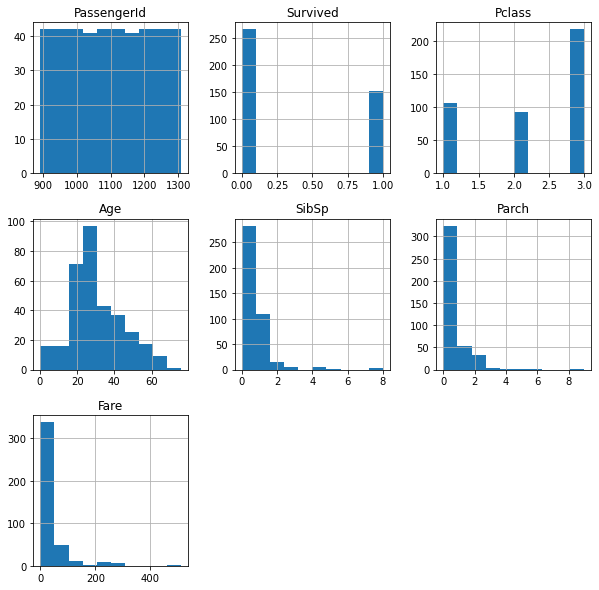

In [4]:
titanic.hist(figsize = (10, 10))
plt.show()

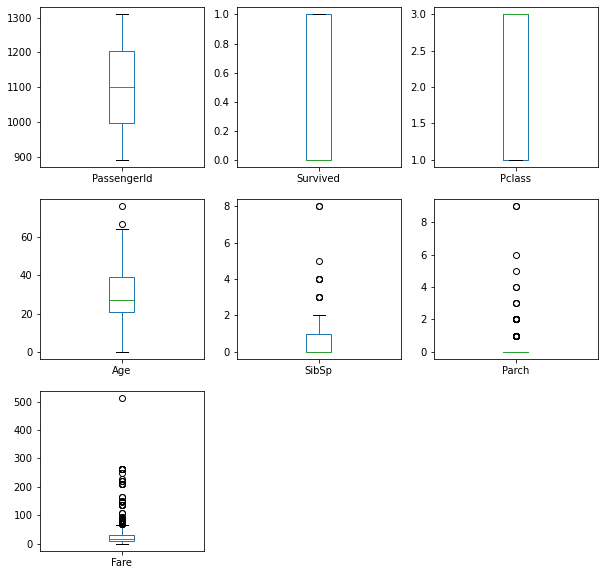

In [5]:
titanic.plot(kind='box', subplots=True,layout=(3,3), sharex=False, figsize = (10,10))
plt.show()

In [6]:
attributes = titanic.columns[0:len(titanic.columns)-1]
print(attributes)
print(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.023245 -0.026751 -0.034102  0.003818  0.043080   
Survived       -0.023245  1.000000 -0.108615 -0.000013  0.099943  0.159120   
Pclass         -0.026751 -0.108615  1.000000 -0.492143  0.001087  0.018721   
Age            -0.034102 -0.000013 -0.492143  1.000000 -0.091587 -0.061249   
SibSp           0.003818  0.099943  0.001087 -0.091587  1.000000  0.306895   
Parch           0.043080  0.159120  0.018721 -0.061249  0.306895  1.000000   
Fare            0.008211  0.191514 -0.577147  0.337932  0.171539  0.230046   

                 Fare  
PassengerId  0.008211  
Survived     0.191514  
Pclass      -0.577147  
Age          0.337932  
SibSp        0.171539  
Parch        0.230046  
Fare         1.000000  


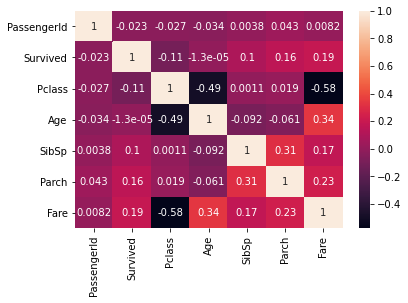

In [7]:
correlation = titanic[titanic.columns].corr()
print(correlation)
sns.heatmap(correlation, annot=True)
plt.show()

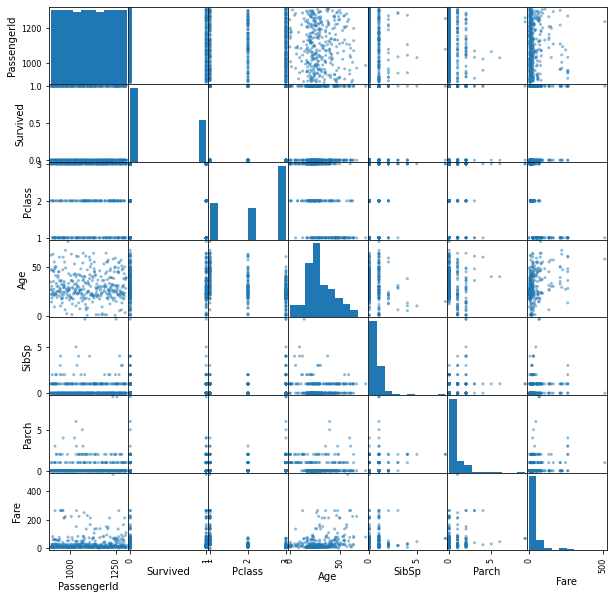

In [8]:
pd.plotting.scatter_matrix(titanic, figsize = (10, 10))
plt.show()

## Preprocesamiento de Datos

La base de datos del titcanic cuenta con algunas columnas cuyos datos son strings, Name, Sex, Ticket, Cabin y Embarked. De estos datos, consideramos que los únicos relevantes, al momento de hacer análisis, son Sex y Embarked. Por ello se borraron las columnas de Name, Ticket y Cabin, y convertimos a numero las variables de Sex y Embarked.

In [13]:
# los valores de sex tendran un rango de 0 a 1
titanic.replace('male', 0, inplace=True)
titanic.replace('female', 1, inplace=True)
# los valores de embarked tendran un rango de 0 a 2
titanic.replace('S', 0, inplace=True)
titanic.replace('Q', 1, inplace=True)
titanic.replace('C', 2, inplace=True)

titanic.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,1
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,1
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,0,NaN,0,0,8.0500,0
414,1306,1,1,1,39.0,0,0,108.9000,2
415,1307,0,3,0,38.5,0,0,7.2500,0
416,1308,0,3,0,NaN,0,0,8.0500,0


Como existen algunos datos que contienen valores de NaN, debemos eliminarlos para que tengan valores utiles para el procesamiento de datos.

In [14]:
col = titanic.columns # obtengo lista de labels de las columnas

titanic.dropna(subset = col, inplace=True) # eliminar filas con algun valor NaN

titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,1
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,1
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...,...
409,1301,1,3,1,3.0,1,1,13.7750,0
411,1303,1,1,1,37.0,1,0,90.0000,1
412,1304,1,3,1,28.0,0,0,7.7750,0
414,1306,1,1,1,39.0,0,0,108.9000,2


In [15]:
# comienzo separando los atributos de la clase
X = titanic.iloc[:,2:]
X # almacena todos los atributos

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,1
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,1
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
409,3,1,3.0,1,1,13.7750,0
411,1,1,37.0,1,0,90.0000,1
412,3,1,28.0,0,0,7.7750,0
414,1,1,39.0,0,0,108.9000,2


In [16]:
# separando la clase
Y = titanic.iloc[:,1]
Y

0      0
1      1
2      0
3      0
4      1
      ..
409    1
411    1
412    1
414    1
415    0
Name: Survived, Length: 331, dtype: int64

In [19]:
# estandarizacion/escalamiento de los datos
rescaledX = StandardScaler().fit_transform(X)
Xnuevo = pd.DataFrame(data = rescaledX, columns=X.columns)
Xnuevo

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.015426,-0.789018,0.306657,-0.553272,-0.492120,-0.542281,0.508681
1,1.015426,1.267399,1.194236,0.591310,-0.492120,-0.555844,-0.652515
2,-0.168046,-0.789018,2.259331,-0.553272,-0.492120,-0.511885,0.508681
3,1.015426,-0.789018,-0.225890,-0.553272,-0.492120,-0.528651,-0.652515
4,1.015426,1.267399,-0.580922,0.591310,0.741907,-0.469357,-0.652515
...,...,...,...,...,...,...,...
326,1.015426,1.267399,-1.930042,0.591310,0.741907,-0.445026,-0.652515
327,-1.351518,1.267399,0.484173,0.591310,-0.492120,0.801785,0.508681
328,1.015426,1.267399,-0.154884,-0.553272,-0.492120,-0.543168,-0.652515
329,-1.351518,1.267399,0.626186,-0.553272,-0.492120,1.110932,1.669877


## Entrenamiento de Modelo

In [20]:
# ya estamos listos para que los datos sean usados por el modelo de aprendizaje

# instanciar el modelo
modelo = GaussianNB()

In [21]:
# separacion de mis datos para entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(Xnuevo, Y, random_state=11, test_size=0.1, train_size=0.9)

In [22]:
# entrenamiento del modelo de aprencizaje con validacion cruzada con 10 folds
models = [] # lista de modelos de aprendizaje predictivo
models.append(("Naive Bayes", GaussianNB()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=15)
    cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    names.append(name)
    results.append(cv_result)

for i in range(len(names)):
    print("Accuracy of ", names[i], " = ", results[i].mean())


#kfold = KFold(n_splits = 10)
#cv_result = cross_val_score(modelo, X_train, Y_train, cv=kfold, scoring="accuracy")
#cv_result

Accuracy of  Naive Bayes  =  1.0


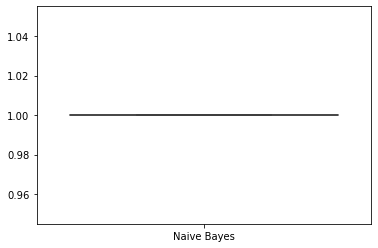

In [23]:
ax = sns.boxplot(data = results)
ax.set_xticklabels(names)
plt.show()

In [24]:
pruebaNaive = GaussianNB() # cargo nuevamente el modelo
pruebaNaive.fit(X_train, Y_train) # genero el modelo con los datos de entrenamiento
naive_prediction = pruebaNaive.predict(X_test) # hacemos la prediccion propiamente dicha

print(X_test)
naive_prediction

       Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
222  1.015426  1.267399 -2.001049  0.591310  0.741907 -0.339728 -0.652515
270  1.015426  1.267399 -1.006960 -0.553272 -0.492120 -0.545212 -0.652515
102 -0.168046 -0.789018  0.839205 -0.553272 -0.492120 -0.457702 -0.652515
169 -0.168046  1.267399  2.117319  0.591310 -0.492120 -0.245062 -0.652515
233 -0.168046 -0.789018  0.910211 -0.553272  0.741907 -0.326847 -0.652515
101  1.015426 -0.789018 -0.580922 -0.553272 -0.492120 -0.542827 -0.652515
220  1.015426 -0.789018 -2.089807  0.591310  0.741907 -0.445026 -0.652515
228  1.015426 -0.789018 -0.296897 -0.553272 -0.492120 -0.541192 -0.652515
157  1.015426  1.267399 -0.864947 -0.553272 -0.492120 -0.543168 -0.652515
14  -0.168046  1.267399 -0.438909  0.591310 -0.492120 -0.216915  1.669877
291 -0.168046 -0.789018 -0.651928  0.591310 -0.492120 -0.482238 -0.652515
197 -0.168046  1.267399 -0.083878  0.591310 -0.492120 -0.245062 -0.652515
285 -0.168046  1.267399  0.058135 -0.5

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [25]:
print(Y_test)

284    1
345    1
128    0
213    1
302    0
126    0
281    0
295    0
197    1
15     1
370    0
248    1
362    1
373    0
194    0
309    1
277    0
404    0
141    1
63     1
305    1
341    0
293    0
21     0
17     0
71     0
122    1
298    0
385    1
190    0
104    1
388    0
13     0
221    0
Name: Survived, dtype: int64


In [26]:
print("Analisis de precision de la etapa de pruebas")
accuracy_score(Y_test, naive_prediction)

Analisis de precision de la etapa de pruebas


1.0

In [27]:
print(classification_report(Y_test, naive_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

